<a href="https://colab.research.google.com/github/Rubeeno80/Assessment-3-Report-UG-Group-4-Online/blob/main/Assessment_3_Part_A_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assessment 3: Part A - Report**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Step 1 - Reading the dataset
import pandas as pd
import seaborn as sns

boat_df = pd.read_csv('/content/drive/MyDrive/Dataset/Boats_Cleaned_dataset.csv')

boat_df_clean = boat_df.drop_duplicates()

print(boat_df_clean.sample(6))

       Unnamed: 0       id   type       boatClass               make  \
17718       18680  7125541  power  power-runabout           Bayliner   
12963       13382  6967780  power   power-pontoon        Sun Tracker   
16484       17294  6945011  power       power-jet             Scarab   
13037       13456  6861100  power  power-aluminum            Tracker   
13276       13713  6968745  power       power-pwc  Yamaha WaveRunner   
10966       11205  6870901  power   power-pontoon          Berkshire   

                      model  year condition  length_ft  beam_ft  ...  \
17718       235 Capri Sport  2001      used      23.83     8.33  ...   
12963  Bass Buggy 16 DLX ET  2019       new      16.00     7.08  ...   
16484                 255 G  2019       new      25.00     8.33  ...   
13037   Super Guide V-16 SC  2019       new      16.00     6.33  ...   
13276                  VX-C  2019       new      11.00     4.00  ...   
10966                  260E  2013      used      26.00     8.50

In [ ]:
#step 2 - problem descirption
boat_shape = boat_df_clean.shape
dataset_col = boat_df_clean.columns

dfboat = {
    'boat_shape': boat_shape,
    'dataset_col': dataset_col,
    'dependent_var': 'price',
    'independent_var': [col for col in dataset_col if col != 'price']

}

print(dfboat)


{'boat_shape': (18903, 26), 'dataset_col': Index(['Unnamed: 0', 'id', 'type', 'boatClass', 'make', 'model', 'year',
       'condition', 'length_ft', 'beam_ft', 'dryWeight_lb', 'hullMaterial',
       'fuelType', 'numEngines', 'totalHP', 'maxEngineYear', 'minEngineYear',
       'engineCategory', 'price', 'sellerId', 'city', 'state', 'zip',
       'created_date', 'created_month', 'created_year'],
      dtype='object'), 'dependent_var': 'price', 'independent_var': ['Unnamed: 0', 'id', 'type', 'boatClass', 'make', 'model', 'year', 'condition', 'length_ft', 'beam_ft', 'dryWeight_lb', 'hullMaterial', 'fuelType', 'numEngines', 'totalHP', 'maxEngineYear', 'minEngineYear', 'engineCategory', 'sellerId', 'city', 'state', 'zip', 'created_date', 'created_month', 'created_year']}


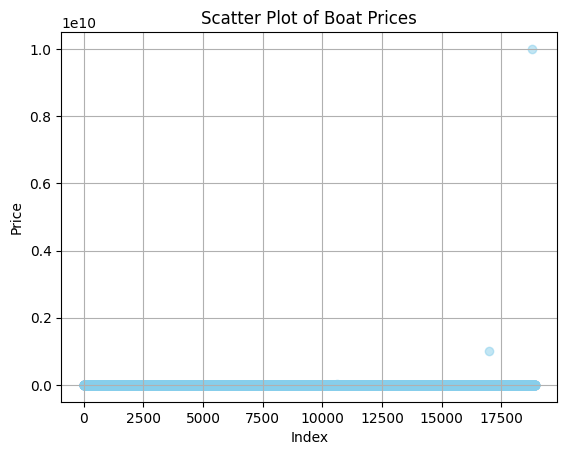

In [ ]:
#Step 3 - Visualising the distribution of Target variable
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

plt.scatter(range(len(boat_df_clean)), boat_df_clean['price'], alpha=0.5, color='skyblue')
plt.title('Scatter Plot of Boat Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [ ]:
#Step 4 - Data exploration
boat_df_clean.info() # Intitial data

unwanted_columns = ['Unnamed: 0', 'id', 'sellerId', 'city', 'state', 'zip', 'created_date', 'created_month', 'created_year','model','make']

df_cleaned = boat_df_clean.drop(columns=unwanted_columns)

df_cleaned.info() # removed unwanted columns

data_shape = df_cleaned.shape
data_types = df_cleaned.dtypes

quantitative_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
price_columns = df_cleaned.columns[df_cleaned.columns.str.contains('price', case=False)].tolist()
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()

print("\nQuantitative Columns:") # Specified Quantitative columns
print(quantitative_columns)

print("\nCategorical Columns:") # Specified Categorical columns
print(categorical_columns)

print("\nPrice Columns:") # Specified Price columns
print(price_columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18903 entries, 0 to 18902
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      18903 non-null  int64  
 1   id              18903 non-null  int64  
 2   type            18903 non-null  object 
 3   boatClass       18903 non-null  object 
 4   make            18903 non-null  object 
 5   model           18868 non-null  object 
 6   year            18903 non-null  int64  
 7   condition       18903 non-null  object 
 8   length_ft       18903 non-null  float64
 9   beam_ft         12399 non-null  float64
 10  dryWeight_lb    7094 non-null   float64
 11  hullMaterial    18903 non-null  object 
 12  fuelType        15951 non-null  object 
 13  numEngines      18903 non-null  int64  
 14  totalHP         18055 non-null  float64
 15  maxEngineYear   2205 non-null   float64
 16  minEngineYear   2174 non-null   float64
 17  engineCategory  8410 non-null  

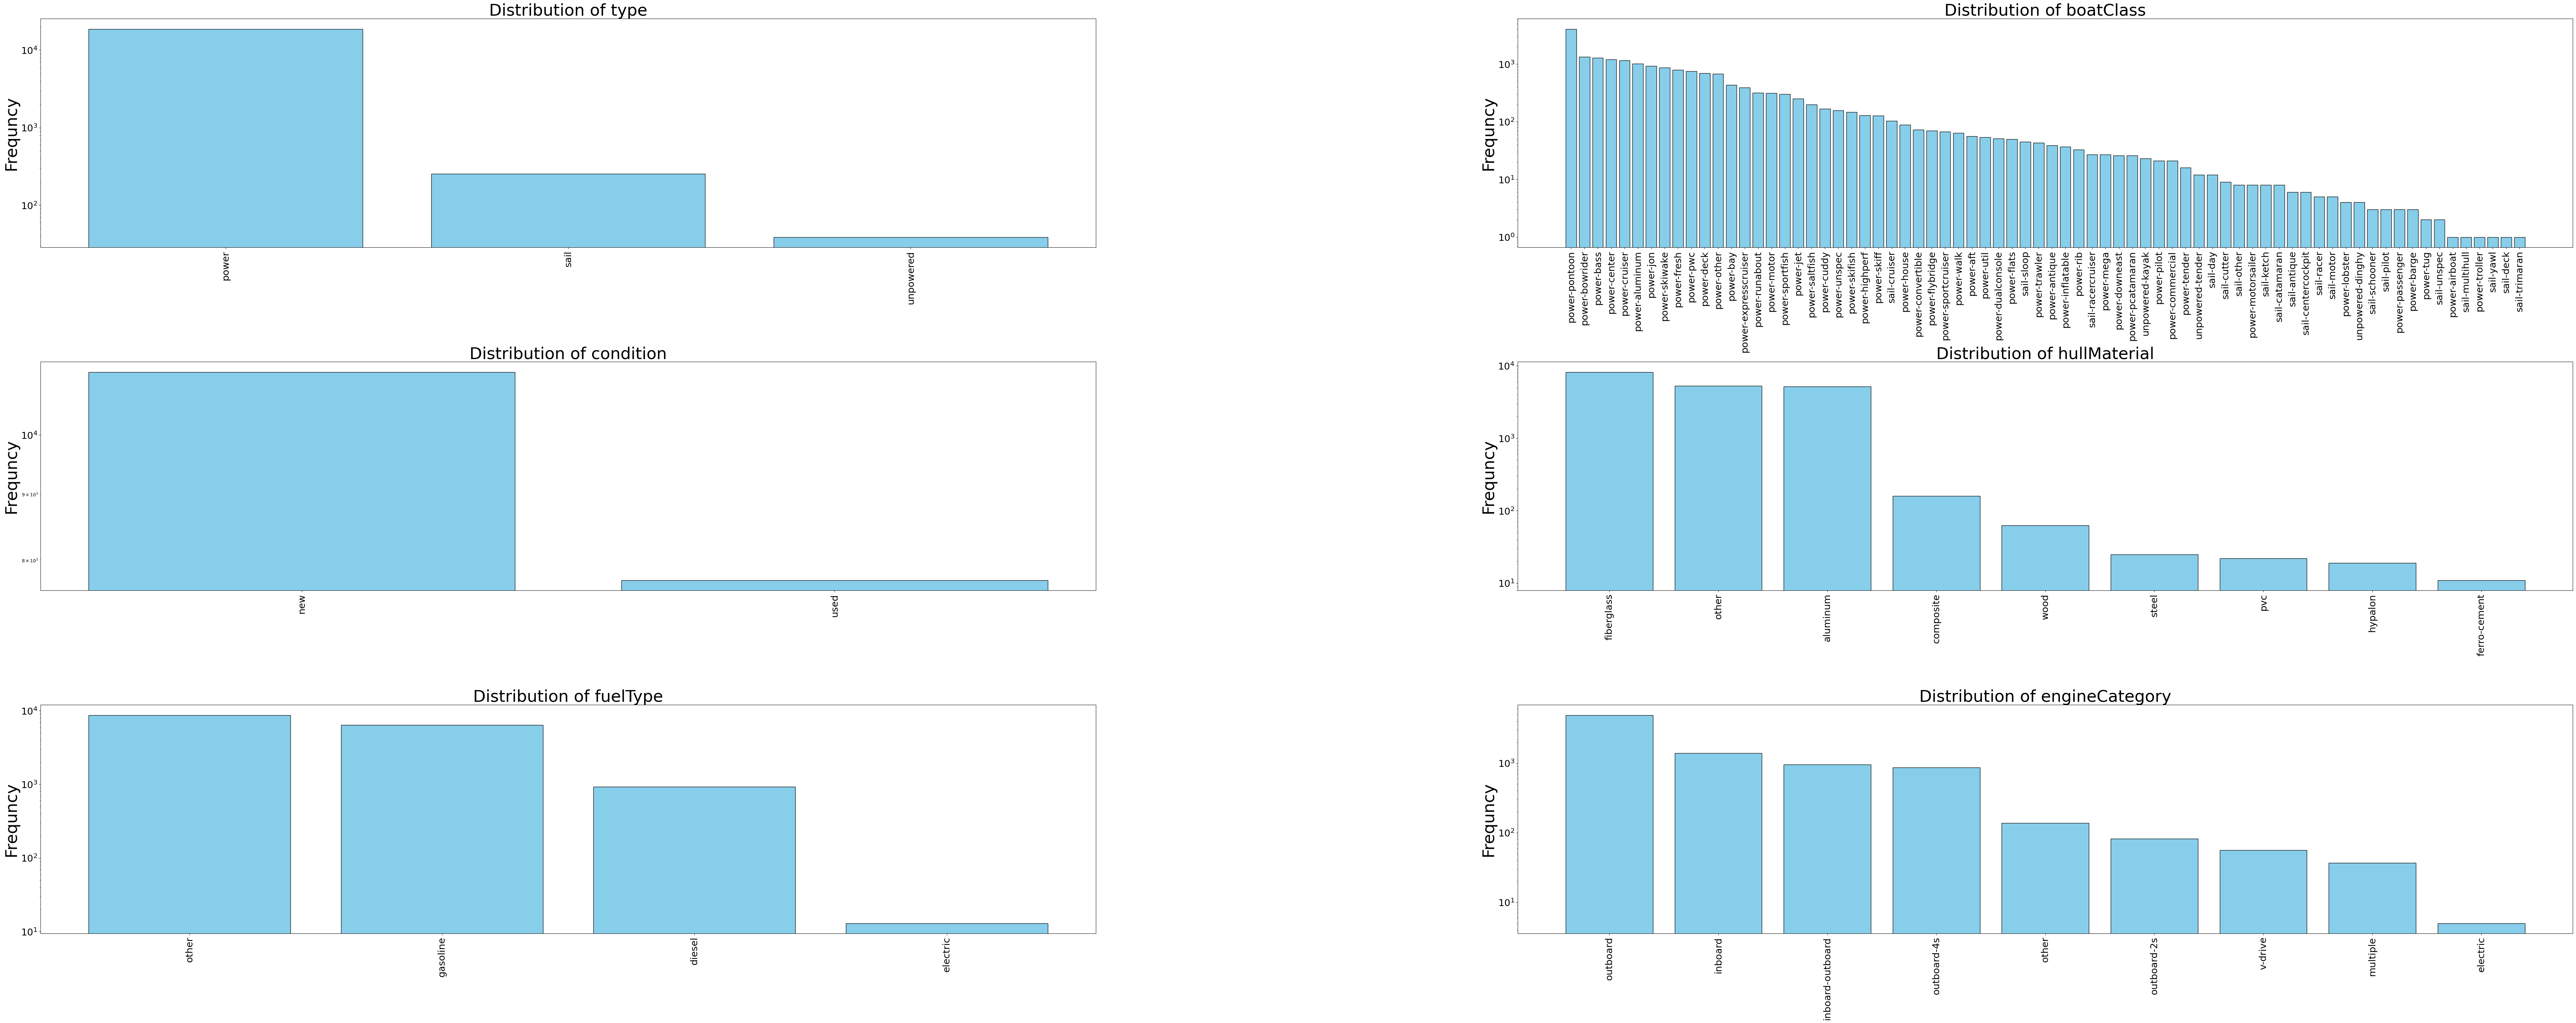

In [ ]:
#Step 5a - Visual Exploratpry Data - Bar diagrams


plt.figure(figsize=(100, 50))  # Set figure size for clarity

for i, column in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns)//2 + 1, 2, i + 1)

    # Count the frequency of each category
    value_counts = df_cleaned[column].value_counts()

    # Create bar plot
    plt.bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=36)
    plt.ylabel('Frequncy', fontsize=36)
    plt.yscale('log') # Used to help visualise the distribution
    plt.xticks(rotation=90, fontsize=21)  # Rotate x-axis labels for better readability
    plt.yticks(fontsize=21)

plt.subplots_adjust(hspace=0.5, wspace=0.4)

plt.show()



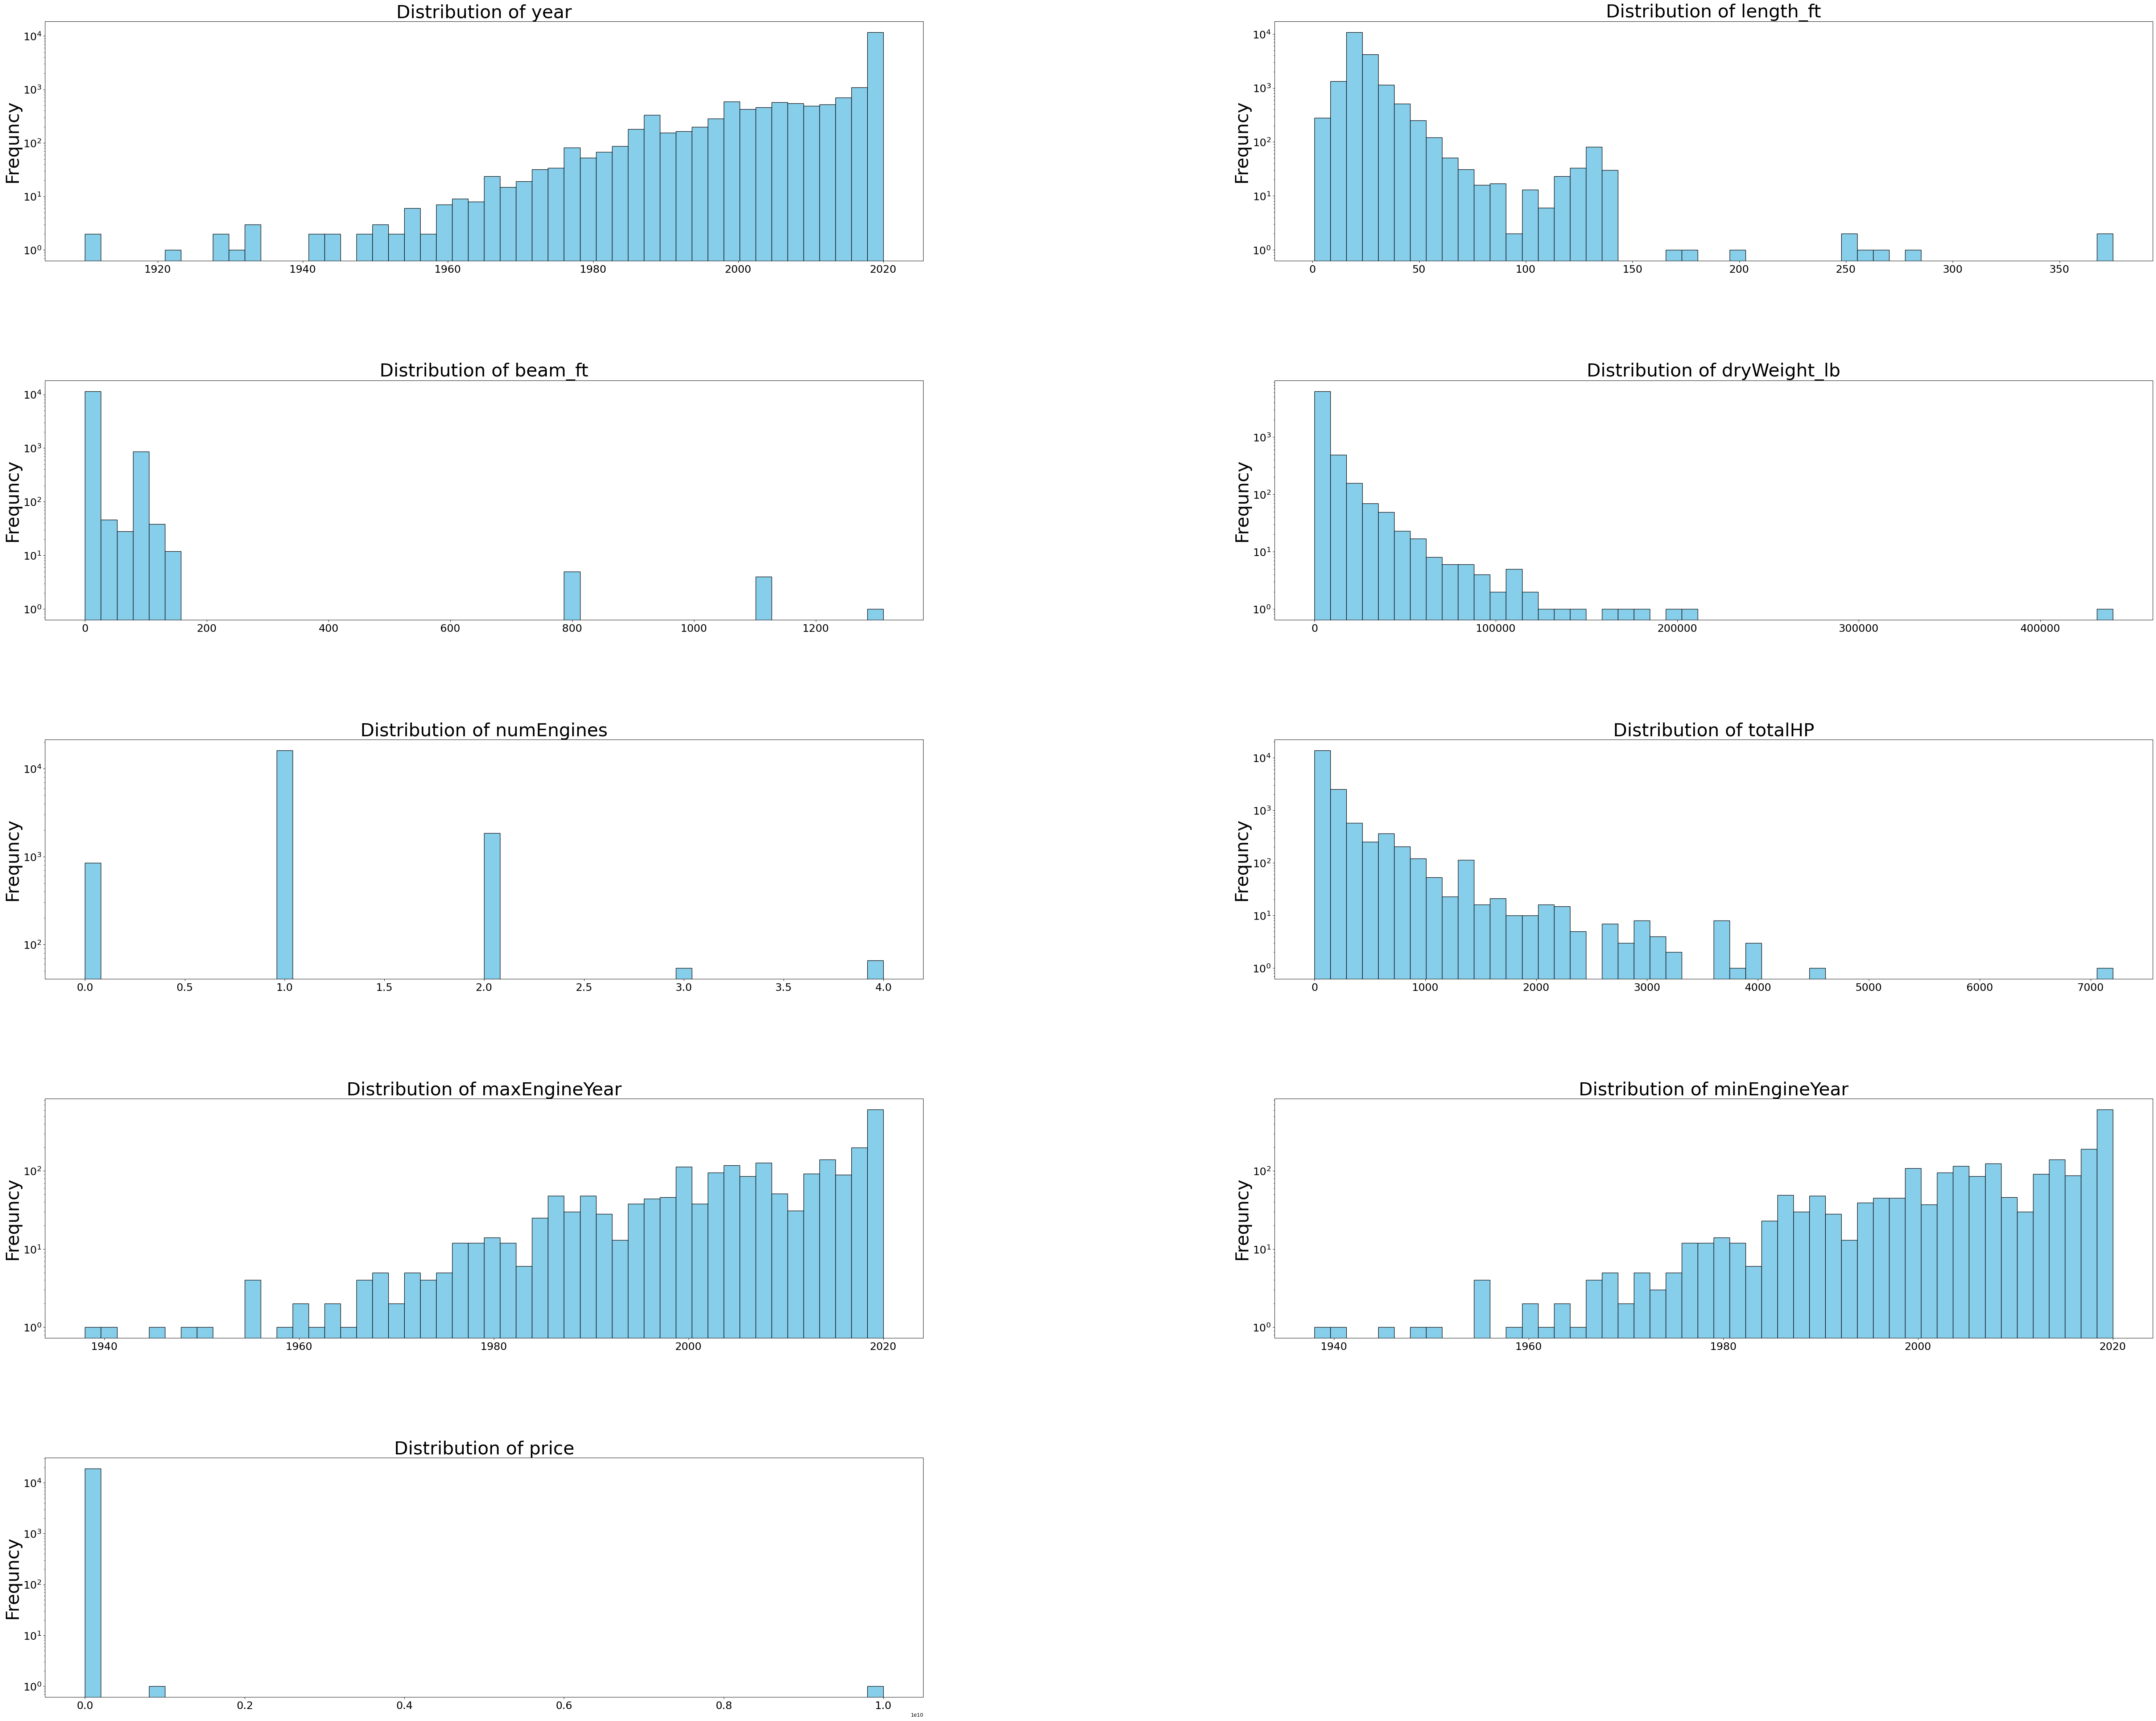

In [ ]:
#Step 5b - Visual Exploratory Data - Histograms

plt.figure(figsize=(75, 60))

for i, column in enumerate(quantitative_columns):
    plt.subplot(len(quantitative_columns)//2 + 1, 2, i + 1)

    plt.hist(df_cleaned[column], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=36)
    plt.ylabel('Frequncy', fontsize=36)
    plt.yscale('log') # Used to help visualise the distribution
    plt.xticks(fontsize=21)  # Rotate x-axis labels for better readability
    plt.yticks(fontsize=21)
    plt.subplots_adjust(hspace=0.5, wspace=0.4)

plt.show()

In [ ]:
# Step 6 - Outlier Analysis

# Create a copy of df_cleaned (which has dropped unwanted columns)
df_cleaned_no_outlier = df_cleaned.copy()  # DataFrame without outlier analysis

# Create another copy for outlier analysis
df_cleaned_IQR = df_cleaned.copy()  # DataFrame for outlier analysis

# Outlier Analysis on df_cleaned_IQR

# Loop through quantitative columns to detect and remove outliers using Interquartile Range (IQR)
for column in quantitative_columns:
    Q1 = df_cleaned_IQR[column].quantile(0.25)
    Q3 = df_cleaned_IQR[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 30 * IQR
    upper_bound = Q3 + 30 * IQR

    # Filter out outliers from df_cleaned_IQR only
    df_cleaned_IQR = df_cleaned_IQR[(df_cleaned_IQR[column] >= lower_bound) & (df_cleaned_IQR[column] <= upper_bound)]

    print(f"Outliers removed from {column}")

# Step 4: Display the shape of both DataFrames after processing
print("Shape of df_cleaned_no_outlier (no outlier removal):", df_cleaned_no_outlier.shape)
print("Shape of df_cleaned_IQR (after outlier removal):", df_cleaned_IQR.shape)


Outliers removed from year
Outliers removed from length_ft
Outliers removed from beam_ft
Outliers removed from dryWeight_lb
Outliers removed from numEngines
Outliers removed from totalHP
Outliers removed from maxEngineYear
Outliers removed from minEngineYear
Outliers removed from price
Shape of df_cleaned_no_outlier (no outlier removal): (18903, 15)
Shape of df_cleaned_IQR (after outlier removal): (725, 15)


In [ ]:
# Step 7 - Missing values

# Convert object-type columns to more specific types where possible
df_cleaned_IQR = df_cleaned_IQR.infer_objects()

# Interpolate only on numeric (quantitative) columns
df_cleaned_IQR[quantitative_columns] = df_cleaned_IQR[quantitative_columns].interpolate(method='linear', inplace=False)

# Impute missing values for continuous variables with the median
for column in quantitative_columns:
    df_cleaned_IQR[column] = df_cleaned_IQR[column].fillna(df_cleaned_IQR[column].median())

# Impute missing values for categorical variables with the mode
for column in categorical_columns:
    df_cleaned_IQR[column] = df_cleaned_IQR[column].fillna(df_cleaned_IQR[column].mode()[0])

# Display the shape of the data after treating missing values
df_cleaned_IQR.shape


(725, 15)

Pearson correlation between year and price: 0.12
Pearson correlation between length_ft and price: 0.55
Pearson correlation between beam_ft and price: 0.49
Pearson correlation between dryWeight_lb and price: 0.54
Skipping numEngines as it has constant values.
Pearson correlation between totalHP and price: 0.26
Pearson correlation between maxEngineYear and price: 0.10
Pearson correlation between minEngineYear and price: 0.10


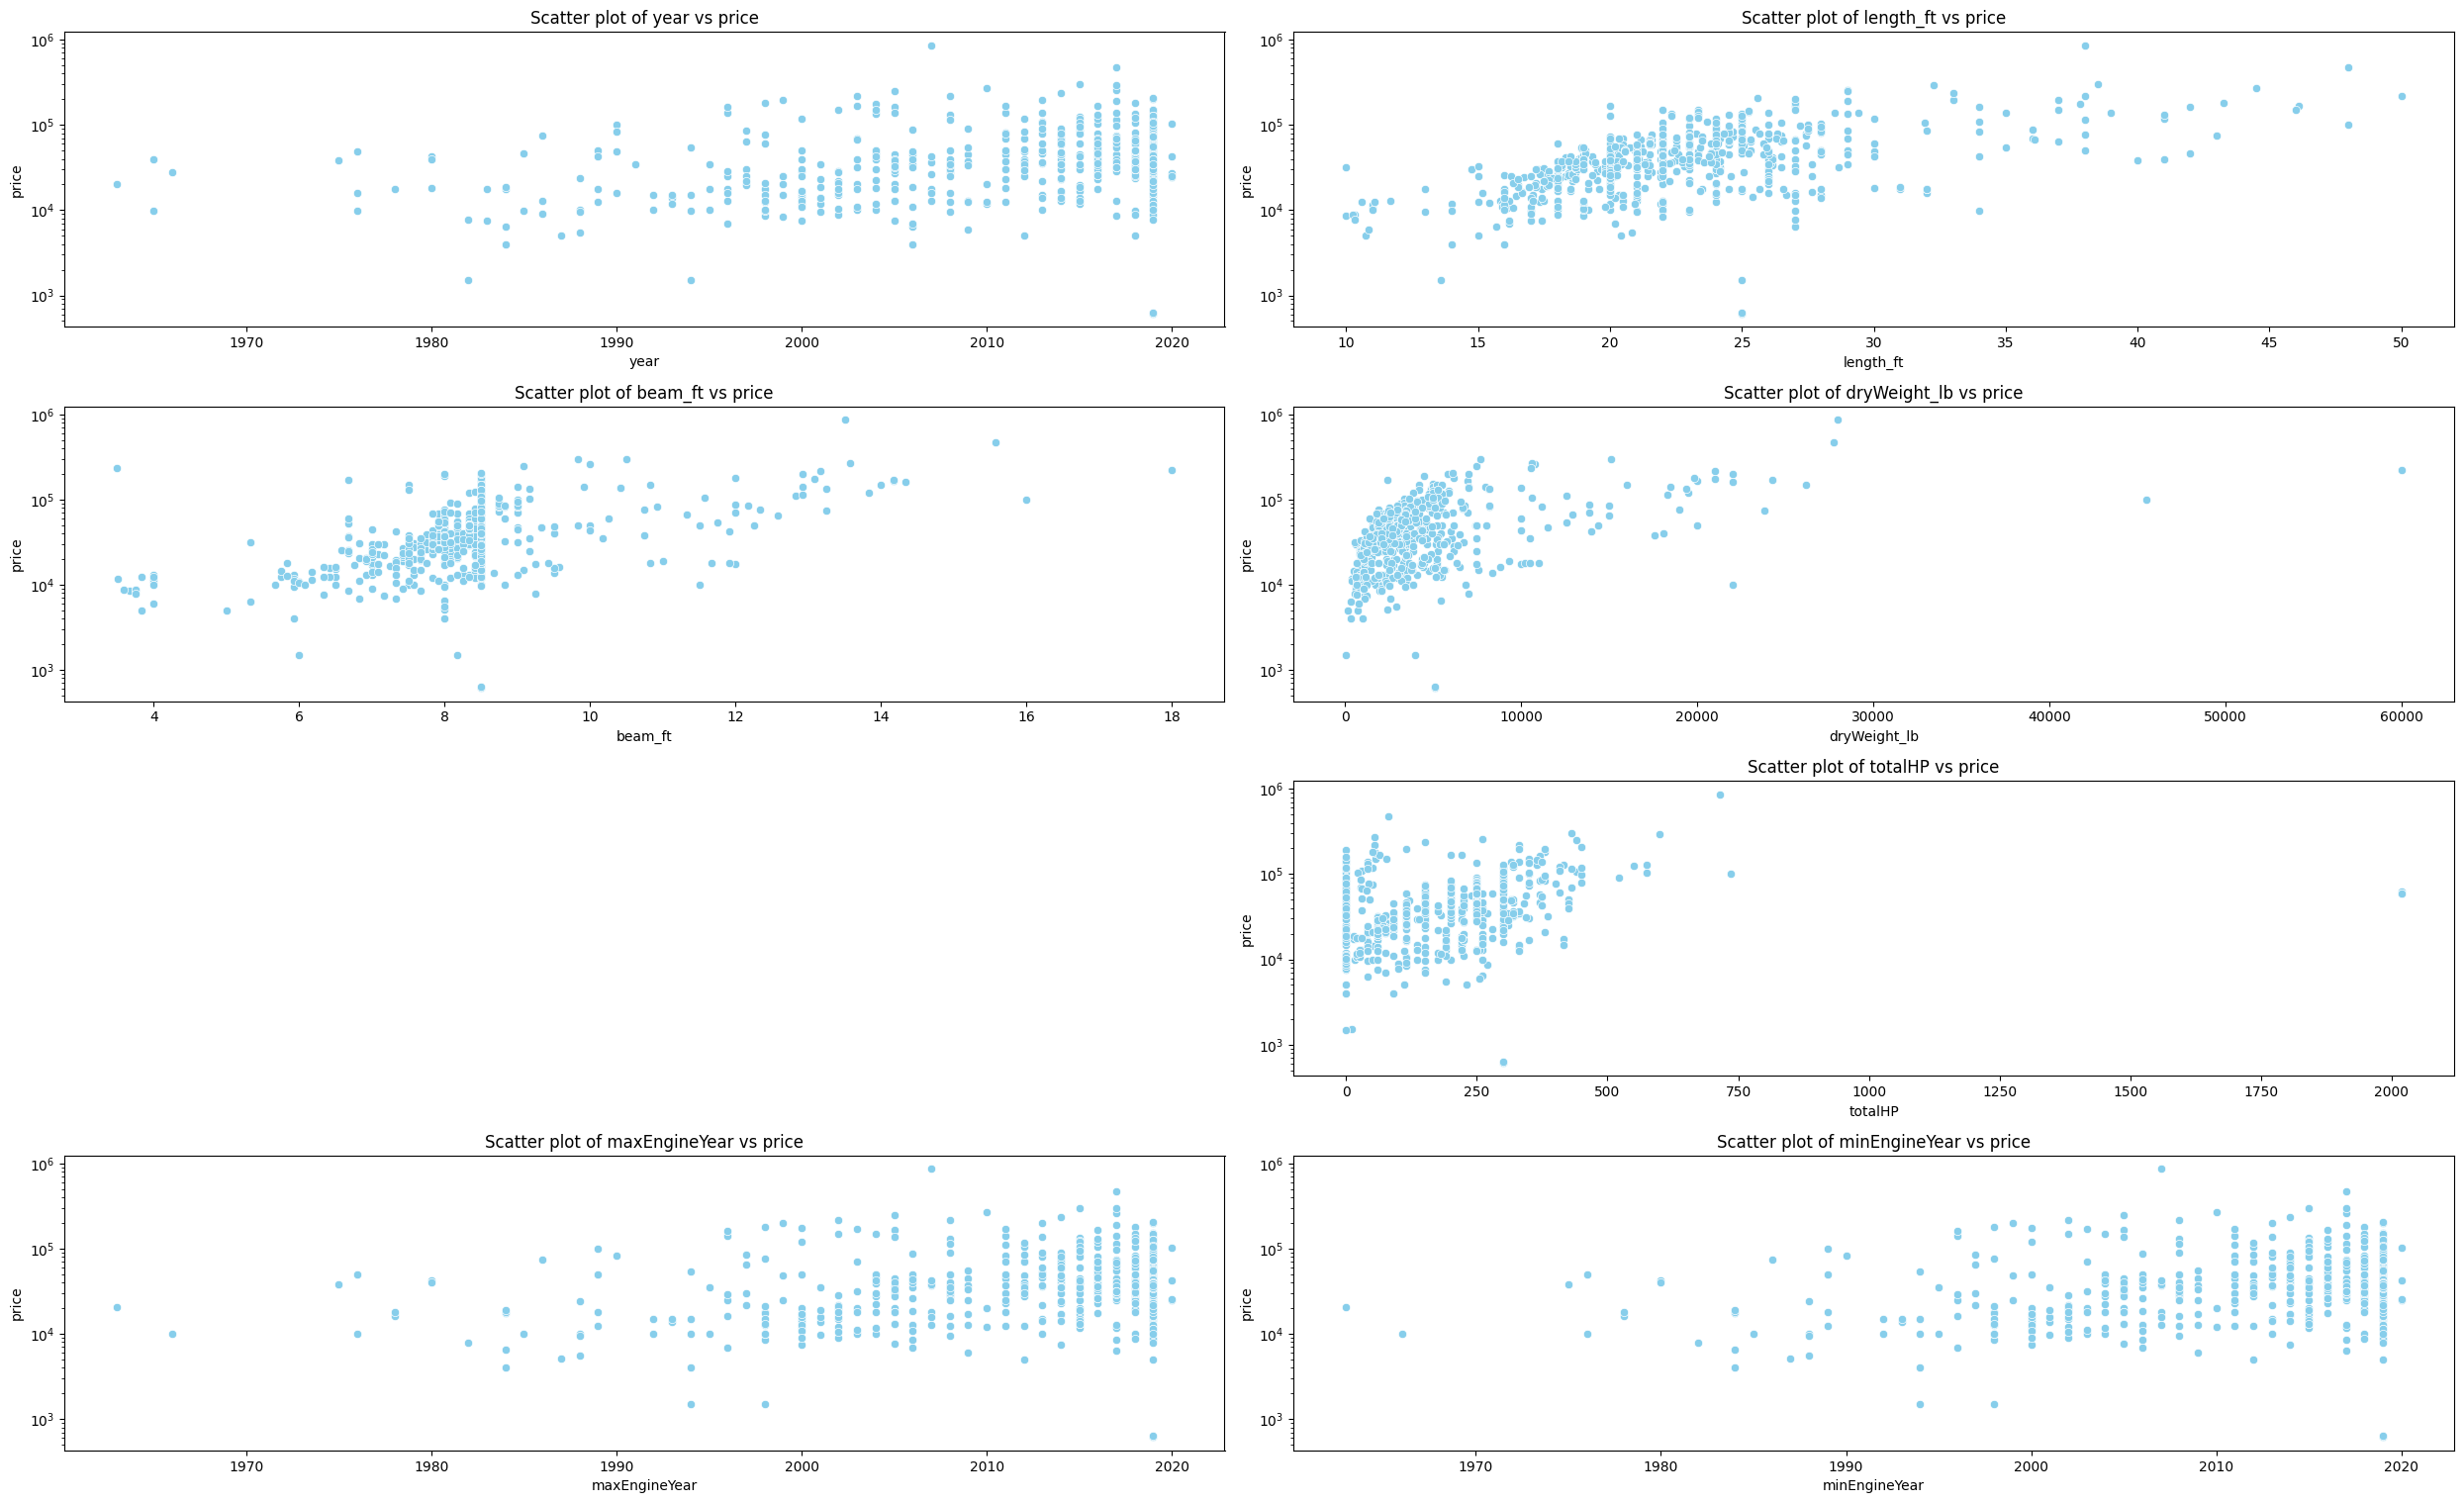

In [ ]:
# Step 8.1 - Scatter plot and Pearson correlation for continuous variables

from scipy.stats import pearsonr

target_variable = 'price'  # Assuming 'price' is the target variable

plt.figure(figsize=(25, 30))

for i, column in enumerate(quantitative_columns):
    if column != target_variable:
        # Check if the column has constant values
        if df_cleaned_IQR[column].nunique() > 1:  # Only proceed if the column has more than one unique value
            plt.subplot(len(quantitative_columns) - 1, 2, i + 1)

            # Scatter plot
            sns.scatterplot(data=df_cleaned_IQR, x=column, y=target_variable, color='skyblue')
            plt.title(f'Scatter plot of {column} vs {target_variable}')
            plt.xlabel(column)
            plt.ylabel(target_variable)
            plt.yscale('log')  # Used to help visualize the distribution

            # Calculate Pearson correlation
            correlation_value, _ = pearsonr(df_cleaned_IQR[column], df_cleaned_IQR[target_variable])
            print(f'Pearson correlation between {column} and {target_variable}: {correlation_value:.2f}')
        else:
            print(f"Skipping {column} as it has constant values.")

plt.tight_layout()
plt.show()


<ipython-input-11-d425720b2b93>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y=target_variable, data=df_cleaned_IQR, palette='Set3')
<ipython-input-11-d425720b2b93>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y=target_variable, data=df_cleaned_IQR, palette='Set3')
<ipython-input-11-d425720b2b93>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y=target_variable, data=df_cleaned_IQR, palette='Set3')
<ipython-input-11-d425720b2b93>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecate

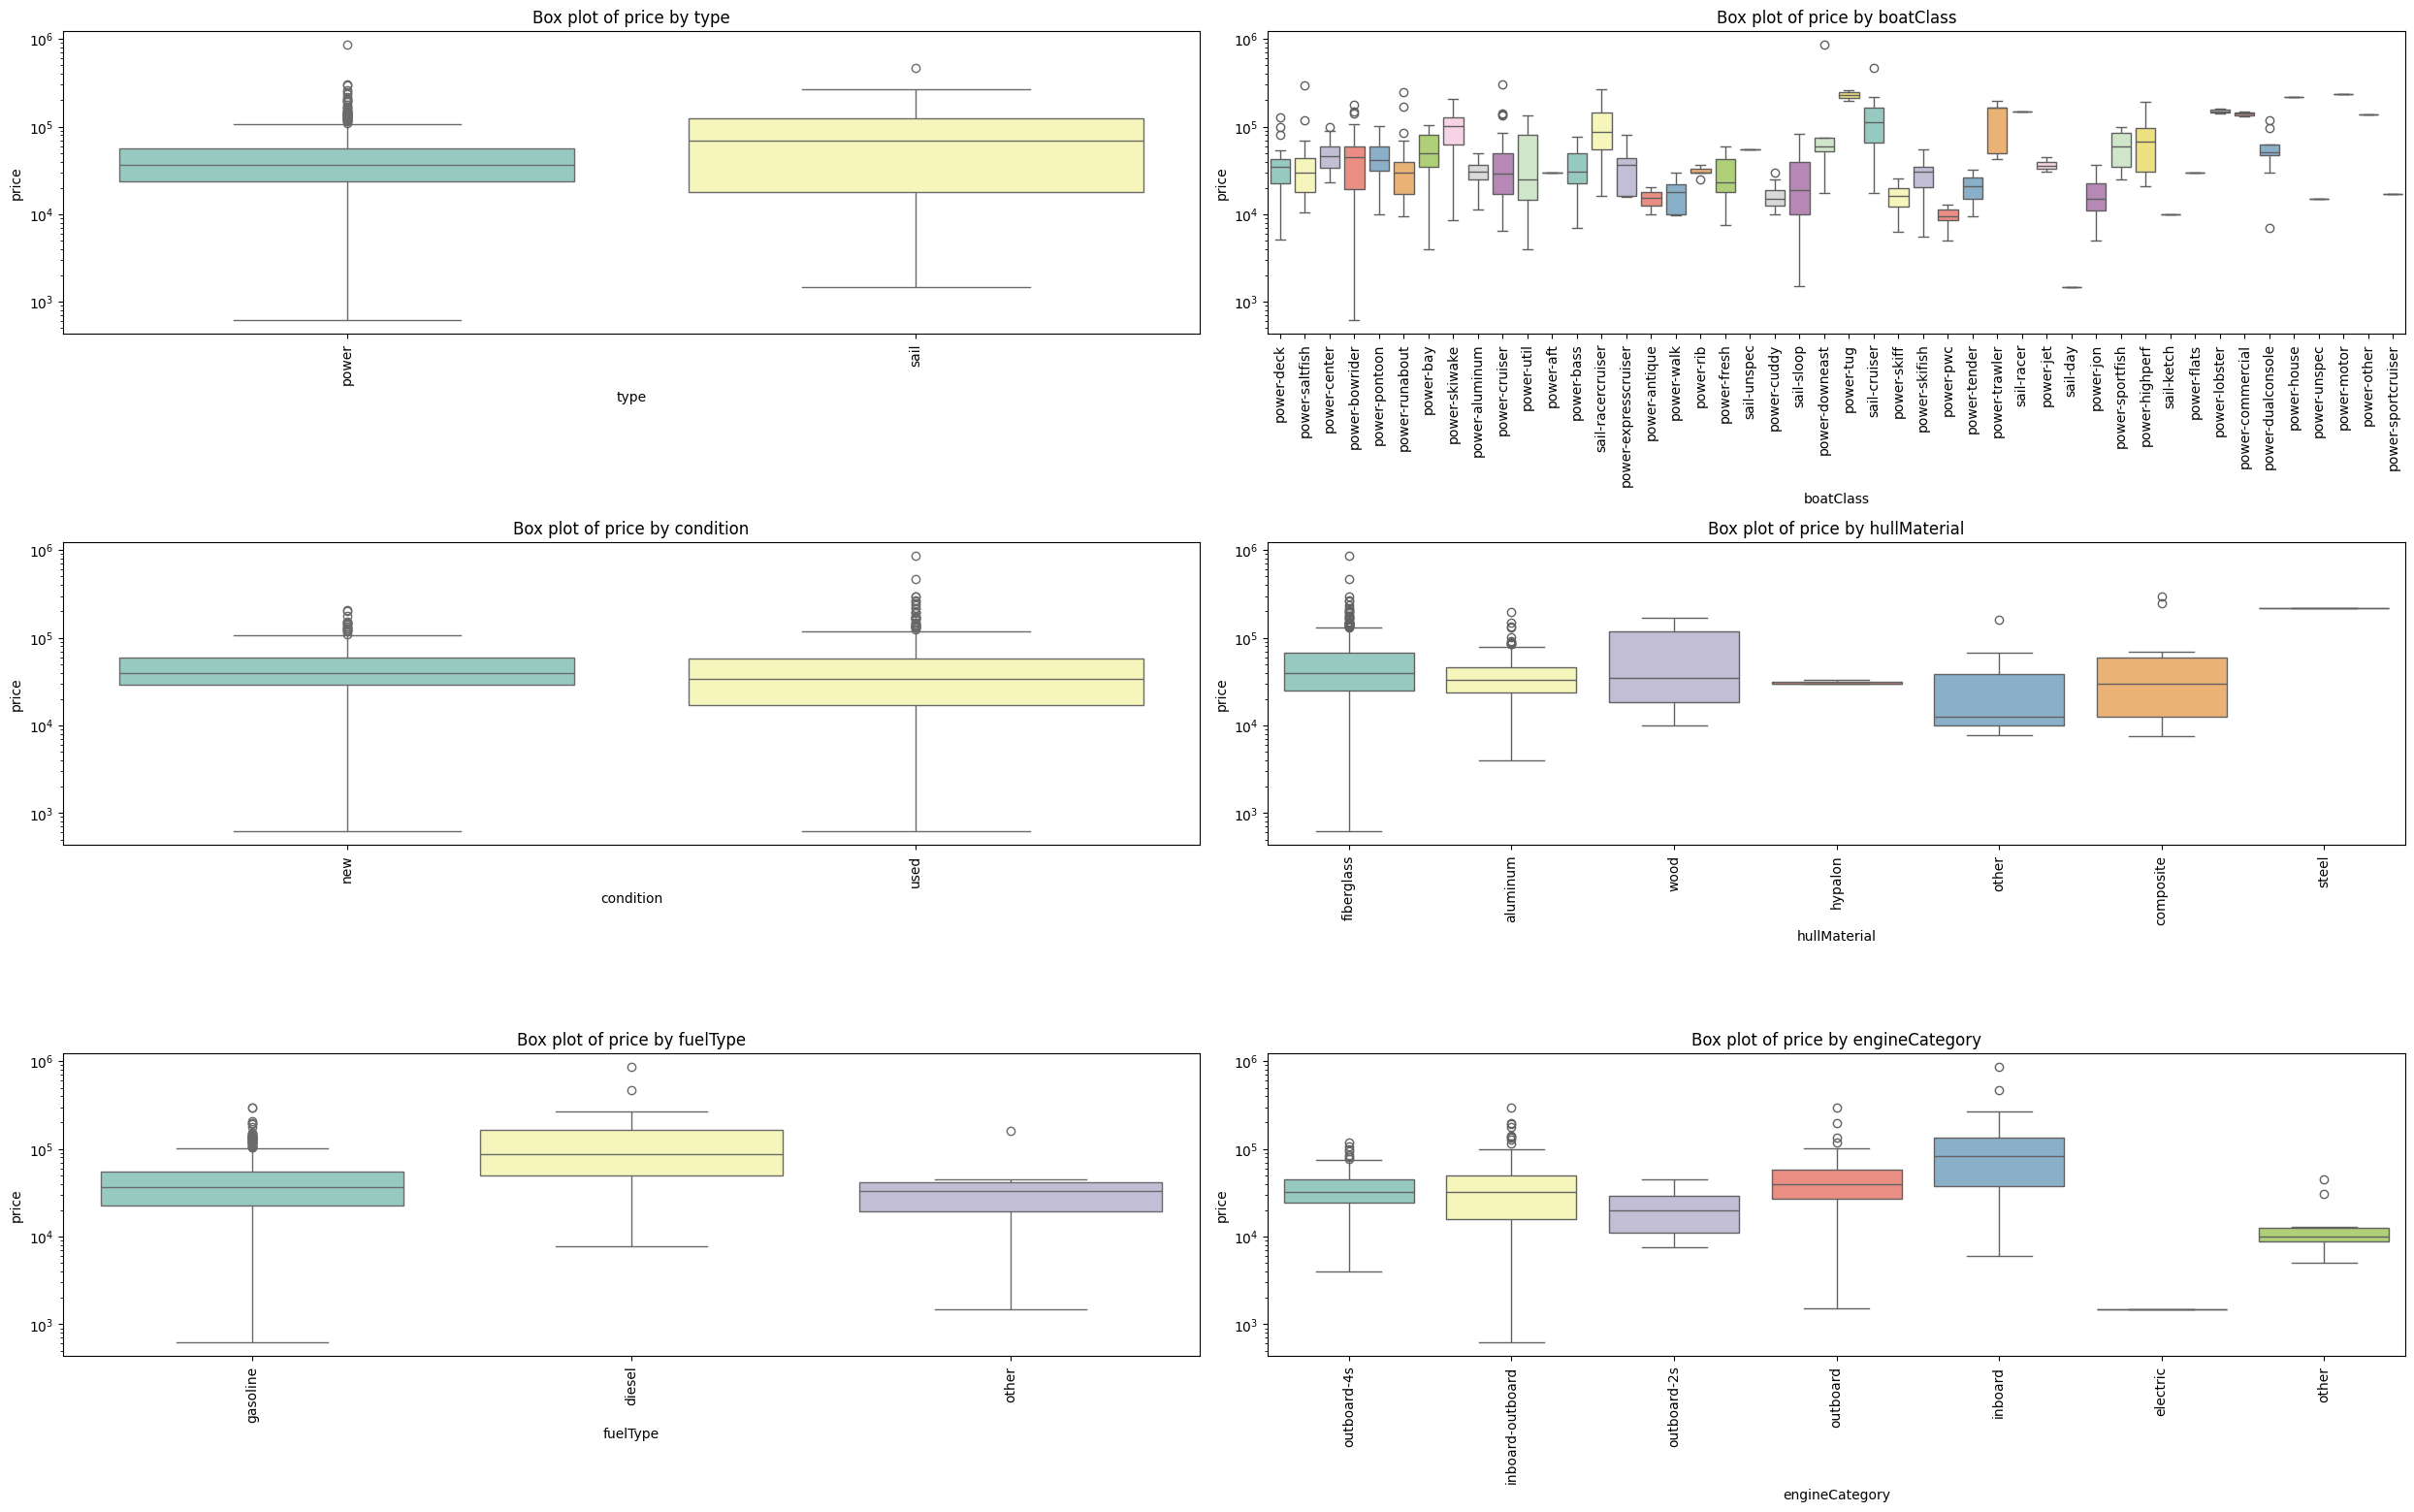

In [ ]:
# Step 8.2 - Box plot for categorical vs. continuous variables
plt.figure(figsize=(25, 30))

for i, column in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 2, i + 1)

    # Box plot
    sns.boxplot(x=column, y=target_variable, data=df_cleaned_IQR, palette='Set3')
    plt.title(f'Box plot of {target_variable} by {column}')
    plt.xticks(rotation=90)
    plt.xlabel(column)
    plt.ylabel(target_variable)
    plt.yscale('log')  # Used to help visualize the distribution

plt.tight_layout()
plt.show()


In [ ]:
from scipy import stats

# Step 9 - ANOVA test for each categorical predictor against the continuous target variable
target_variable = 'price'  # Assuming 'price' is the target variable

# Perform ANOVA test for each categorical predictor
for column in categorical_columns:
    # Group the continuous target variable by the categories of the predictor
    groups = [df_cleaned_IQR[target_variable][df_cleaned_IQR[column] == category] for category in df_cleaned_IQR[column].unique()]

    # Perform one-way ANOVA
    f_stat, p_value = stats.f_oneway(*groups)

    # Display the results
    print(f"ANOVA results for {column}:")
    print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}")

    # Interpret the p-value
    if p_value < 0.05:
        print(f"Reject the null hypothesis (H0). There is a significant relationship between {column} and {target_variable}.")
    else:
        print(f"Fail to reject the null hypothesis (H0). No significant relationship between {column} and {target_variable}.\n")


ANOVA results for type:
F-statistic: 22.5721, P-value: 0.0000
Reject the null hypothesis (H0). There is a significant relationship between type and price.
ANOVA results for boatClass:
F-statistic: 7.5396, P-value: 0.0000
Reject the null hypothesis (H0). There is a significant relationship between boatClass and price.
ANOVA results for condition:
F-statistic: 0.7217, P-value: 0.3959
Fail to reject the null hypothesis (H0). No significant relationship between condition and price.

ANOVA results for hullMaterial:
F-statistic: 4.7683, P-value: 0.0001
Reject the null hypothesis (H0). There is a significant relationship between hullMaterial and price.
ANOVA results for fuelType:
F-statistic: 66.9387, P-value: 0.0000
Reject the null hypothesis (H0). There is a significant relationship between fuelType and price.
ANOVA results for engineCategory:
F-statistic: 25.6031, P-value: 0.0000
Reject the null hypothesis (H0). There is a significant relationship between engineCategory and price.


In [ ]:
# Step 10 - Selecting final predictors/features

from scipy.stats import f_oneway

# Filter continuous variables with strong correlation (e.g., abs(correlation) > 0.5)
selected_continuous_features = []
for column in quantitative_columns:
    if column != target_variable:  # Exclude the target variable itself
        # Check if the column has constant values
        if df_cleaned_IQR[column].nunique() > 1:  # Only calculate correlation if more than one unique value
            correlation_value, _ = pearsonr(df_cleaned_IQR[column], df_cleaned_IQR[target_variable])
            if abs(correlation_value) > 0.5:
                selected_continuous_features.append(column)
            print(f"Pearson correlation between {column} and {target_variable}: {correlation_value:.2f}")
        else:
            print(f"Skipping {column} as it has constant values.")

print("Selected continuous features based on correlation:", selected_continuous_features)

# Filter categorical variables based on ANOVA p-value (p-value < 0.05)
selected_categorical_features = []
for column in categorical_columns:
    groups = [df_cleaned_IQR[target_variable][df_cleaned_IQR[column] == category] for category in df_cleaned_IQR[column].unique()]
    f_stat, p_value = f_oneway(*groups)

    if p_value < 0.05:  # If the p-value is significant
        selected_categorical_features.append(column)
    print(f"ANOVA result for {column}: F-statistic={f_stat:.4f}, p-value={p_value:.4f}")

print("Selected categorical features based on ANOVA:", selected_categorical_features)

# Combine selected continuous and categorical features
final_selected_features = selected_continuous_features + selected_categorical_features

print("Final selected features for machine learning model:", final_selected_features)

# Prepare the final dataset for model building
df_final = df_cleaned_IQR[final_selected_features + [target_variable]]  # Include the target variable

# Display the final dataset shape and columns
print("Final dataset shape:", df_final.shape)
print("Columns in the final dataset:", df_final.columns)

Pearson correlation between year and price: 0.12
Pearson correlation between length_ft and price: 0.55
Pearson correlation between beam_ft and price: 0.49
Pearson correlation between dryWeight_lb and price: 0.54
Skipping numEngines as it has constant values.
Pearson correlation between totalHP and price: 0.26
Pearson correlation between maxEngineYear and price: 0.10
Pearson correlation between minEngineYear and price: 0.10
Selected continuous features based on correlation: ['length_ft', 'dryWeight_lb']
ANOVA result for type: F-statistic=22.5721, p-value=0.0000
ANOVA result for boatClass: F-statistic=7.5396, p-value=0.0000
ANOVA result for condition: F-statistic=0.7217, p-value=0.3959
ANOVA result for hullMaterial: F-statistic=4.7683, p-value=0.0001
ANOVA result for fuelType: F-statistic=66.9387, p-value=0.0000
ANOVA result for engineCategory: F-statistic=25.6031, p-value=0.0000
Selected categorical features based on ANOVA: ['type', 'boatClass', 'hullMaterial', 'fuelType', 'engineCatego

In [ ]:
# Extract unique values for each relevant categorical column
unique_type = boat_df_clean['type'].unique()
unique_boatClass = boat_df_clean['boatClass'].unique()
unique_engineCategory = boat_df_clean['engineCategory'].unique()
unique_hullMaterial = boat_df_clean['hullMaterial'].unique() if 'hullMaterial' in boat_df_clean.columns else None
unique_fuelType = boat_df_clean['fuelType'].unique() if 'fuelType' in boat_df_clean.columns else None

# Organize unique values into a dictionary
unique_categories = {
    "type": unique_type,
    "boatClass": unique_boatClass,
    "engineCategory": unique_engineCategory,
    "hullMaterial": unique_hullMaterial,
    "fuelType": unique_fuelType
}

# Display unique values for each relevant categorical column
print("Unique values for 'type':")
print(unique_type)
print("\nUnique values for 'boatClass':")
print(unique_boatClass)
print("\nUnique values for 'engineCategory':")
print(unique_engineCategory)

if unique_hullMaterial is not None:
    print("\nUnique values for 'hullMaterial':")
    print(unique_hullMaterial)

if unique_fuelType is not None:
    print("\nUnique values for 'fuelType':")
    print(unique_fuelType)

# Ensure all unique values for the dataframe are printed using a loop
for column, unique_values in unique_categories.items():
    print(f"\nUnique values for {column}:")
    print(unique_values)



Unique values for 'type':
['power' 'sail' 'unpowered']

Unique values for 'boatClass':
['power-center' 'power-sportcruiser' 'power-deck' 'power-expresscruiser'
 'power-aft' 'power-cruiser' 'power-mega' 'power-flybridge'
 'power-convertible' 'sail-racercruiser' 'power-pontoon' 'power-motor'
 'sail-cruiser' 'power-bay' 'power-sportfish' 'power-saltfish'
 'sail-ketch' 'power-walk' 'power-bowrider' 'power-runabout'
 'power-skiwake' 'power-cuddy' 'power-bass' 'power-highperf'
 'sail-catamaran' 'power-aluminum' 'power-house' 'sail-schooner'
 'power-util' 'power-rib' 'power-pwc' 'power-jon' 'power-skiff'
 'power-skifish' 'power-jet' 'sail-sloop' 'power-trawler' 'power-antique'
 'power-other' 'power-motorsailer' 'power-dualconsole' 'power-pilot'
 'power-unspec' 'power-fresh' 'power-tender' 'sail-day' 'sail-pilot'
 'power-pcatamaran' 'power-flats' 'sail-other' 'power-inflatable'
 'unpowered-kayak' 'sail-unspec' 'power-commercial' 'sail-cutter'
 'power-downeast' 'power-tug' 'sail-antique' 'sail-

In [ ]:
# Step 11 - Data conversion to numeric using get_dummies()

# Assuming final_selected_features contains both continuous and categorical features

# Apply one-hot encoding to categorical variables
df_final_encoded = pd.get_dummies(df_cleaned_IQR[final_selected_features], drop_first=True)

# Combine the target variable with the encoded dataset
df_final_encoded[target_variable] = df_cleaned_IQR[target_variable]

# Display the final encoded dataset
print("Final dataset with one-hot encoded categorical variables:")
print(df_final_encoded.head())

# Check the shape of the final encoded dataset
print("Shape of final dataset after encoding:", df_final_encoded.shape)


Final dataset with one-hot encoded categorical variables:
    length_ft  dryWeight_lb  type_sail  boatClass_power-aluminum  \
2       18.00        2000.0      False                     False   
29      26.00        5150.0      False                     False   
32      22.00        2500.0      False                     False   
33      21.58        3430.0      False                     False   
34      23.00        4500.0      False                     False   

    boatClass_power-antique  boatClass_power-bass  boatClass_power-bay  \
2                     False                 False                False   
29                    False                 False                False   
32                    False                 False                False   
33                    False                 False                False   
34                    False                 False                False   

    boatClass_power-bowrider  boatClass_power-center  \
2                      False    

In [ ]:
# Step 12 - Split train/test data and standardisation/normalisation of data

from sklearn.model_selection import train_test_split

# Step 12.1: Train/test split
X = df_final_encoded.drop(columns=[target_variable])  # Features
y = df_final_encoded[target_variable]  # Target variable

# Perform an 80/20 split of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (580, 62) (580,)
Testing set shape: (145, 62) (145,)


In [ ]:
#Step 12.2
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choose to standardise
standardise = True  # Set to False if you don't want to apply scaling

if standardise:
    # Step 12.2: Standardization
    scaler = StandardScaler()  # or MinMaxScaler() for normalization

    # Fit the scaler on the training data and transform both train and test sets
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    print("Data has been standardised.")
else:
    print("Data has not been standardised or normalised.")


Data has been standardised.


In [ ]:
#step 13 -  Investigating multiple regression algorithms

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# List of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'AdaBoost Regressor': AdaBoostRegressor(random_state=42),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'SVM Regressor': SVR()
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions on the test set
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

# Dictionary to store the results
results = {}

# Loop through each model, train it, and evaluate it
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    mae, mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[model_name] = {'MAE': mae, 'MSE': mse, 'R2': r2}
    print(f"{model_name} -> MAE: {mae:.4f}, MSE: {mse:.4f}, R2: {r2:.4f}")

# Display the results for all models
print("\nComparison of regression algorithms:")
for model_name, metrics in results.items():
    print(f"{model_name}: MAE={metrics['MAE']:.4f}, MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")



Training and evaluating Linear Regression...
Linear Regression -> MAE: 6060192386973552.0000, MSE: 4161233832052063094000976786358272.0000, R2: -1488334862218679419928576.0000
Training and evaluating Decision Tree Regressor...
Decision Tree Regressor -> MAE: 21597.7840, MSE: 2174788634.6689, R2: 0.2222
Training and evaluating Random Forest Regressor...
Random Forest Regressor -> MAE: 19056.3664, MSE: 1353446323.0511, R2: 0.5159
Training and evaluating AdaBoost Regressor...
AdaBoost Regressor -> MAE: 28227.0318, MSE: 1978206206.1545, R2: 0.2925
Training and evaluating K-Nearest Neighbors Regressor...
K-Nearest Neighbors Regressor -> MAE: 24191.9210, MSE: 2215662886.0473, R2: 0.2075
Training and evaluating SVM Regressor...
SVM Regressor -> MAE: 28301.7713, MSE: 2935513423.2055, R2: -0.0499

Comparison of regression algorithms:
Linear Regression: MAE=6060192386973552.0000, MSE=4161233832052063094000976786358272.0000, R2=-1488334862218679419928576.0000
Decision Tree Regressor: MAE=21597.78

In [ ]:
#step 14 - Selection of the best model

# Function to select the best model based on a specific metric
def select_best_model(results, metric='R2'):
    # Choose a metric to evaluate (R2, MAE, or MSE)
    if metric == 'R2':
        best_model = max(results, key=lambda model: results[model]['R2'])
    elif metric == 'MAE':
        best_model = min(results, key=lambda model: results[model]['MAE'])
    elif metric == 'MSE':
        best_model = min(results, key=lambda model: results[model]['MSE'])
    else:
        raise ValueError("Metric not recognized. Use 'R2', 'MAE', or 'MSE'.")

    return best_model, results[best_model]

# Step 14: Selecting the best model based on R-squared, MAE, or MSE
# We assume `results` dictionary was populated in Step 13 with evaluation metrics

# Display a comparison of all models based on R2, MAE, and MSE
print("\nModel performance comparison:")
for model_name, metrics in results.items():
    print(f"{model_name}: MAE={metrics['MAE']:.4f}, MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")

# Select the best model based on R-squared
best_model_name, best_model_metrics = select_best_model(results, metric='R2')
print(f"\nBest model based on R-squared: {best_model_name} -> R2: {best_model_metrics['R2']:.4f}, MAE: {best_model_metrics['MAE']:.4f}, MSE: {best_model_metrics['MSE']:.4f}")

# (Optional) Select the best model based on MAE (if you prefer error minimization)
# best_model_name_mae, best_model_metrics_mae = select_best_model(results, metric='MAE')
# print(f"\nBest model based on MAE: {best_model_name_mae} -> MAE: {best_model_metrics_mae['MAE']:.4f}, R2: {best_model_metrics_mae['R2']:.4f}, MSE: {best_model_metrics_mae['MSE']:.4f}")

# (Optional) Select the best model based on MSE (for error minimization)
# best_model_name_mse, best_model_metrics_mse = select_best_model(results, metric='MSE')
# print(f"\nBest model based on MSE: {best_model_name_mse} -> MSE: {best_model_metrics_mse['MSE']:.4f}, R2: {best_model_metrics_mse['R2']:.4f}, MAE: {best_model_metrics_mse['MAE']:.4f}")



Model performance comparison:
Linear Regression: MAE=6060192386973552.0000, MSE=4161233832052063094000976786358272.0000, R2=-1488334862218679419928576.0000
Decision Tree Regressor: MAE=21597.7840, MSE=2174788634.6689, R2=0.2222
Random Forest Regressor: MAE=19056.3664, MSE=1353446323.0511, R2=0.5159
AdaBoost Regressor: MAE=28227.0318, MSE=1978206206.1545, R2=0.2925
K-Nearest Neighbors Regressor: MAE=24191.9210, MSE=2215662886.0473, R2=0.2075
SVM Regressor: MAE=28301.7713, MSE=2935513423.2055, R2=-0.0499

Best model based on R-squared: Random Forest Regressor -> R2: 0.5159, MAE: 19056.3664, MSE: 1353446323.0511


In [ ]:
# Step 15 - Retrain/rebuild the model using 100% data available

from sklearn.ensemble import RandomForestRegressor
import joblib  # To save the model
import pandas as pd

# Assuming df_cleaned_no_outlier is your clean dataset after removing outliers and handling missing values
df_cleaned_no_outlier = df_cleaned_no_outlier.infer_objects()

# Define categorical columns and quantitative columns
quantitative_columns = ['length_ft', 'dryWeight_lb']  # Adjust according to your dataset
categorical_columns = ['type', 'boatClass', 'hullMaterial', 'fuelType', 'engineCategory']

# Interpolate only on numeric (quantitative) columns
df_cleaned_no_outlier[quantitative_columns] = df_cleaned_no_outlier[quantitative_columns].interpolate(method='linear', inplace=False)

# Impute missing values for continuous variables with the median
for column in quantitative_columns:
    df_cleaned_no_outlier[column] = df_cleaned_no_outlier[column].fillna(df_cleaned_no_outlier[column].median())

# Impute missing values for categorical variables with the mode
for column in categorical_columns:
    df_cleaned_no_outlier[column] = df_cleaned_no_outlier[column].fillna(df_cleaned_no_outlier[column].mode()[0])

# One-hot encode categorical variables for training
X_full = pd.get_dummies(df_cleaned_no_outlier.drop(columns=[target_variable]), drop_first=True)  # Features (encoded)
y_full = df_cleaned_no_outlier[target_variable]  # Target variable (assumed to be 'price' or equivalent)

# Rebuild and retrain the best model (Random Forest Regressor)
best_model = RandomForestRegressor(random_state=42)

# Fit the model on the entire dataset (100% data)
best_model.fit(X_full, y_full)

# Save the model to a file for future use or deployment
model_filename = 'best_model_random_forest_full_data.pkl'
joblib.dump((best_model, X_full.columns), model_filename)  # Save both the model and the columns

print(f"Model retrained on 100% of the data and saved to {model_filename}.")




Model retrained on 100% of the data and saved to best_model_random_forest_full_data.pkl.


In [ ]:
# Step 15.1
import numpy as np

# Load the saved model (adjust the path if necessary)
model_filename = 'best_model_random_forest_full_data.pkl'
model = joblib.load(model_filename)

# Prediction function
def predict_price(input_data):
    """
    Predicts the target value (price) based on input data.

    Parameters:
    input_data (list or array): The input features for the model.

    Returns:
    float: The predicted price.
    """
    # Convert input data to a 2D array
    input_array = np.array(input_data).reshape(1, -1)

    # Make the prediction using the loaded model
    prediction = model.predict(input_array)

    return prediction[0]  # Return the predicted price


In [ ]:
# 15.2 Step to include when saving the model after training
X_full = pd.get_dummies(df_cleaned_no_outlier.drop(columns=[target_variable]), drop_first=True)  # Features (encoded)
y_full = df_cleaned_no_outlier[target_variable]  # Target variable

best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_full, y_full)

# Save both the model and the training feature names
model_filename = 'best_model_random_forest_full_data.pkl'
joblib.dump((best_model, X_full.columns), model_filename)

print(f"Model retrained on 100% of the data and saved to {model_filename}.")


Model retrained on 100% of the data and saved to best_model_random_forest_full_data.pkl.


In [ ]:
#Step 15.3 - test.
import joblib
import pandas as pd

# Load the saved model and feature names
model_filename = 'best_model_random_forest_full_data.pkl'
best_model, training_columns = joblib.load(model_filename)

# Function to preprocess and predict
def preprocess_and_predict(input_data):
    """
    Preprocess the input data to match the format of the training data,
    then make a prediction.
    """

    # Define expected categorical values for one-hot encoding
    categories = {
        'type': ['power', 'sail', 'unpowered'],
        'boatClass': ['power-center', 'power-sportcruiser', 'power-deck', 'power-expresscruiser',
                      'power-aft', 'power-cruiser', 'power-mega', 'power-flybridge'],
        'hullMaterial': ['fiberglass', 'aluminum', 'other'],
        'fuelType': ['gasoline', 'diesel', 'electric', 'other'],
        'engineCategory': ['outboard-4s', 'inboard-outboard', 'inboard', 'outboard', 'electric']
    }

    # Create a DataFrame for input
    input_df = pd.DataFrame([input_data], columns=['length_ft', 'dryWeight_lb', 'type', 'boatClass', 'hullMaterial', 'fuelType', 'engineCategory'])

    # One-hot encode each categorical column
    input_df_encoded = pd.get_dummies(input_df, columns=['type', 'boatClass', 'hullMaterial', 'fuelType', 'engineCategory'], drop_first=True)

    # Ensure the encoded DataFrame contains all the expected columns
    for col, values in categories.items():
        for value in values:
            col_name = f"{col}_{value}"
            if col_name not in input_df_encoded.columns:
                input_df_encoded[col_name] = 0  # Add missing columns with default 0

    # Reindex the DataFrame to match the training columns
    input_df_encoded = input_df_encoded.reindex(columns=training_columns, fill_value=0)

    # Make the prediction using the pre-trained model
    prediction = best_model.predict(input_df_encoded)

    return prediction[0]

# Example input data
new_data = [30.5, 10000, 'power', 'power-deck', 'fiberglass', 'gasoline', 'outboard-4s']

# Call the prediction function
predicted_price = preprocess_and_predict(new_data)

# Display the predicted price
print(f"Predicted price: ${predicted_price:.2f}")



Predicted price: $41653.85


In [ ]:
# Step 1: Install streamlit
!pip install streamlit pyngrok

# Step 2: Set up ngrok authtoken
!ngrok authtoken 2nkPcWMmFJYXcQVPxq2P0at89Pj_7mjXC3st1EvPe9CEWafDY



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.2 MB/s eta 0:00:00
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

# Kill all active ngrok processes
ngrok.kill()

In [ ]:
#step 15.3 Gui interface

%%writefile app.py
import streamlit as st
import pandas as pd # We already imported pandas?
import joblib

# Load the saved model and the columns used for training
model, columns_used_for_training = joblib.load('/content/best_model_random_forest_full_data.pkl')

# Mapping categorical options to their corresponding unique values
type_options = {'Power': 'power', 'Sail': 'sail', 'Unpowered': 'unpowered'}
boat_class_options = {'Power-Center': 'power-center', 'Power-Sportcruiser': 'power-sportcruiser', 'Power-Deck': 'power-deck', 'Power-Expresscruiser': 'power-expresscruiser',
                      'Power-Aft': 'power-aft', 'Power-Cruiser': 'power-cruiser', 'Power-Mega': 'power-mega', 'Power-Flybridge': 'power-flybridge',
                      'Sail-RacerCruiser': 'sail-racercruiser', 'Power-Pontoon': 'power-pontoon'}
hull_material_options = {'Fiberglass': 'fiberglass', 'Aluminum': 'aluminum', 'Composite': 'composite', 'Wood': 'wood', 'Steel': 'steel', 'PVC': 'pvc'}
fuel_type_options = {'Gasoline': 'gasoline', 'Diesel': 'diesel', 'Electric': 'electric', 'Other': 'other'}
engine_category_options = {'Outboard-4S': 'outboard-4s', 'Inboard-Outboard': 'inboard-outboard', 'Multiple': 'multiple', 'Inboard': 'inboard'}

# Prediction function
def predict_price(input_data):
    input_df = pd.DataFrame([input_data], columns=['length_ft', 'dryWeight_lb', 'type', 'boatClass', 'hullMaterial', 'fuelType', 'engineCategory'])
    input_df_encoded = pd.get_dummies(input_df, drop_first=True)
    input_df_encoded = input_df_encoded.reindex(columns=columns_used_for_training, fill_value=0)
    prediction = model.predict(input_df_encoded)
    return prediction[0]

# Streamlit app layout
st.title("Boat Price Prediction")

# Input fields for the model
length_ft = st.number_input("Length (ft)", value=0.0)
dry_weight = st.number_input("Dry Weight (lb)", value=0.0)

# Select boxes for human-readable categories and map to their unique values
type_display = st.selectbox("Type", list(type_options.keys()))
boat_class_display = st.selectbox("Boat Class", list(boat_class_options.keys()))
hull_material_display = st.selectbox("Hull Material", list(hull_material_options.keys()))
fuel_type_display = st.selectbox("Fuel Type", list(fuel_type_options.keys()))
engine_category_display = st.selectbox("Engine Category", list(engine_category_options.keys()))

# Convert human-readable selections to unique values for the model
type_value = type_options[type_display]
boat_class_value = boat_class_options[boat_class_display]
hull_material_value = hull_material_options[hull_material_display]
fuel_type_value = fuel_type_options[fuel_type_display]
engine_category_value = engine_category_options[engine_category_display]

# Predict button
if st.button("Predict Price"):
    # Prepare input data
    input_data = [length_ft, dry_weight, type_value, boat_class_value, hull_material_value, fuel_type_value, engine_category_value]

    # Get the predicted price
    predicted_price = predict_price(input_data)

    # Display the result
    st.success(f"Predicted price: ${predicted_price:.2f}")

    # Also display the human-readable input values
    st.write(f"Boat Type: {type_display}")
    st.write(f"Boat Class: {boat_class_display}")
    st.write(f"Hull Material: {hull_material_display}")
    st.write(f"Fuel Type: {fuel_type_display}")
    st.write(f"Engine Category: {engine_category_display}")



Writing app.py


In [ ]:
import subprocess
import time
from pyngrok import ngrok

# Step 4: Run Streamlit in the background
process = subprocess.Popen(['streamlit', 'run', 'app.py'])

# Step 5: Give Streamlit some time to start
time.sleep(5)

# Step 6: Expose the Streamlit app using ngrok
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at {public_url}")


Streamlit app is live at NgrokTunnel: "https://5335-34-125-88-91.ngrok-free.app" -> "http://localhost:8501"
